# Frequency Modulation (FM)

This notebook demonstrates analog Frequency Modulation (FM) techniques, including:
1.  **Narrowband FM (NBFM)**
2.  **Wideband FM (WBFM)**

## General Theory

In Frequency Modulation, the instantaneous frequency of the carrier is varied linearly with the message signal $m(t)$.

The FM signal equation is given by:

$$ s(t) = A_c \cos(2\pi f_c t + \phi(t)) $$

where the instantaneous phase $\phi(t)$ is related to the message by:

$$ \phi(t) = 2\pi k_f \int_0^t m(\tau) d\tau $$

If the message signal is a single tone sinusoidal wave $m(t) = A_m \cos(2\pi f_m t)$, then:

$$ s(t) = A_c \cos(2\pi f_c t + \beta \sin(2\pi f_m t)) $$

where:
- $f_c$ is the carrier frequency.
- $f_m$ is the message frequency.
- $\beta = \frac{\Delta f}{f_m}$ is the **Modulation Index**.
- $\Delta f = k_f A_m$ is the **Frequency Deviation**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn # Bessel function of the first kind

# Global Plotting Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

# Simulation Parameters
fs = 100_000        # sampling frequency (Hz)
fc = 10_000         # carrier frequency (Hz)
fm = 500            # message frequency (Hz)
duration = 0.05     # seconds

t = np.arange(0, duration, 1/fs)

# Carrier Amplitude
Ac = 1.0

print(f"Sampling Frequency: {fs} Hz")
print(f"Carrier Frequency: {fc} Hz")
print(f"Message Frequency: {fm} Hz")

Sampling Frequency: 100000 Hz
Carrier Frequency: 10000 Hz
Message Frequency: 500 Hz


In [2]:
def plot_spectrum(sig, fs, title="Frequency Spectrum", xlim=None):
    """
    Helper function to plot the magnitude spectrum of a signal.
    """
    n = len(sig)
    k = np.arange(n)
    T = n/fs
    frq = k/T 
    frq = frq[range(n//2)] # one side frequency range

    Y = np.fft.fft(sig)/n # fft computing and normalization
    Y = Y[range(n//2)]
    
    plt.figure()
    plt.plot(frq, abs(Y), 'b') 
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.title(title)
    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim(fc - 10*fm, fc + 10*fm) # Default zoom around carrier
    plt.grid(True)
    plt.show()

def plot_time_domain(t, sig, title):
    plt.figure()
    plt.plot(t, sig, label='Modulated Signal')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

## 1. Narrowband FM (NBFM)

Narrowband FM occurs when the modulation index is small ($\beta \ll 1$). 
In this case, the bandwidth is approximately equal to twice the message bandwidth, similar to AM.

**Characteristics:**
- Small deviation ($\Delta f$)
- Spectrum primarily contains the carrier and one pair of significant sidebands at $f_c \pm f_m$.
- Similar bandwidth to AM ($2 f_m$).

NBFM Beta: 0.5


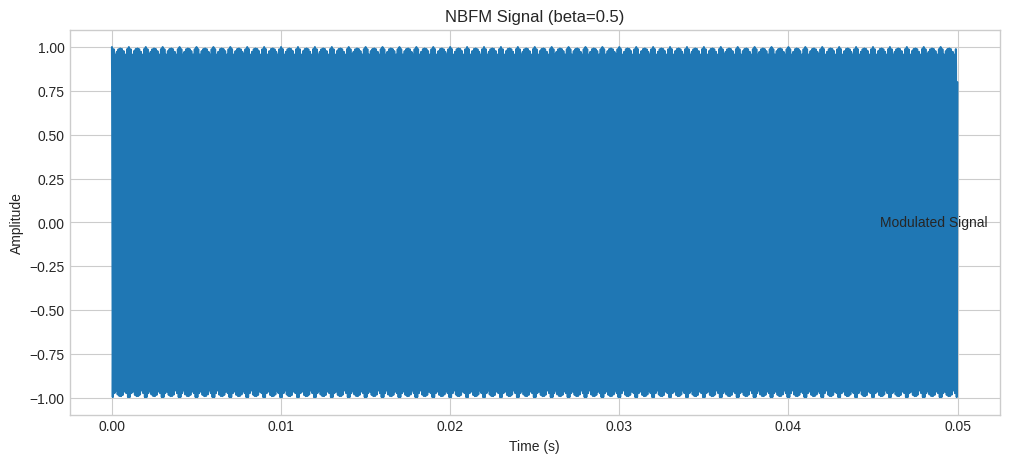

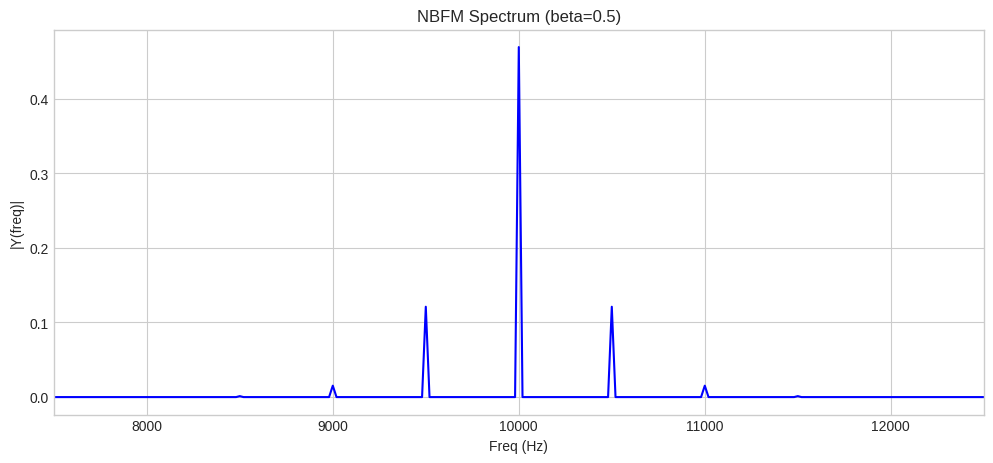

In [3]:
beta_nbfm = 0.5  # Modulation index < 1

# FM Signal: s(t) = Ac * cos(2*pi*fc*t + beta * sin(2*pi*fm*t))
# (Corresponding to a cosine message signal)
s_nbfm = Ac * np.cos(2*np.pi*fc*t + beta_nbfm * np.sin(2*np.pi*fm*t))

print(f"NBFM Beta: {beta_nbfm}")

plot_time_domain(t, s_nbfm, f"NBFM Signal (beta={beta_nbfm})")
plot_spectrum(s_nbfm, fs, f"NBFM Spectrum (beta={beta_nbfm})", xlim=(fc - 5*fm, fc + 5*fm))

## 2. Wideband FM (WBFM)

Wideband FM occurs when the modulation index is large ($\beta \gg 1$). 
The spectrum contains many sidebands spaced by $f_m$.

**Carson's Rule for Bandwidth:**
The approximate bandwidth required to transmit the FM signal is:

$$ BW \approx 2(\Delta f + f_m) = 2f_m(\beta + 1) $$

As $\beta$ increases, the bandwidth increases significantly beyond $2f_m$.
WBFM offers superior noise rejection compared to NBFM and AM.

WBFM Beta: 5.0
Frequency Deviation: 2500.0 Hz
Carson's Rule Bandwidth: 6000.0 Hz


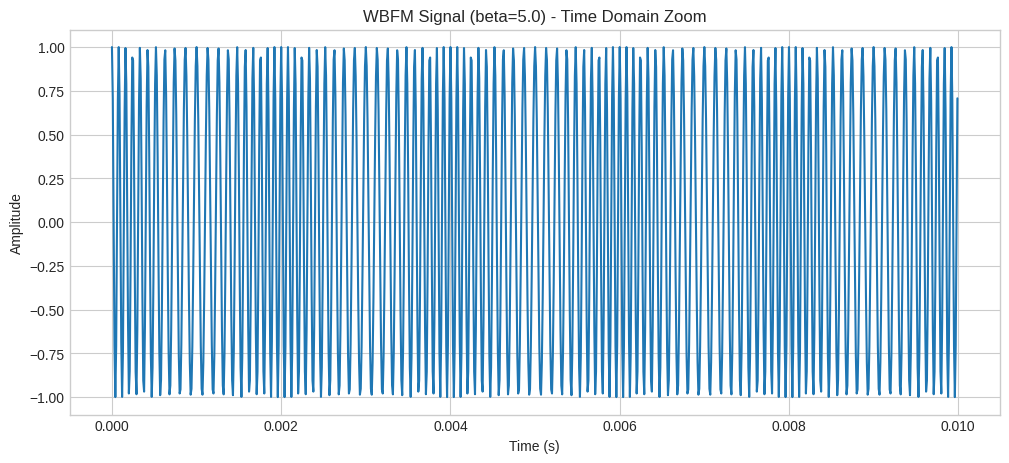

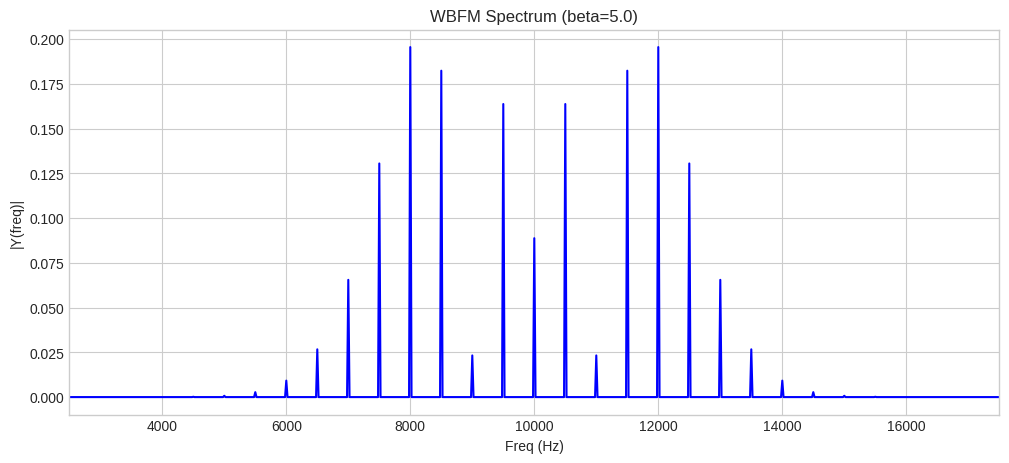

In [4]:
beta_wbfm = 5.0  # Modulation index > 1

s_wbfm = Ac * np.cos(2*np.pi*fc*t + beta_wbfm * np.sin(2*np.pi*fm*t))

# Calculate Bandwidth
delta_f = beta_wbfm * fm
bw_carson = 2 * (delta_f + fm)

print(f"WBFM Beta: {beta_wbfm}")
print(f"Frequency Deviation: {delta_f} Hz")
print(f"Carson's Rule Bandwidth: {bw_carson} Hz")

# Plot a shorter segment to see the waveform details
t_zoom = t[:int(0.01*fs)]
s_zoom = s_wbfm[:int(0.01*fs)]

plt.figure()
plt.plot(t_zoom, s_zoom)
plt.title(f"WBFM Signal (beta={beta_wbfm}) - Time Domain Zoom")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plot_spectrum(s_wbfm, fs, f"WBFM Spectrum (beta={beta_wbfm})", xlim=(fc - 15*fm, fc + 15*fm))

## 3. Theoretical Validation

The spectrum of an FM signal with a single-tone message consists of a carrier and infinite sidebands at $f_c \pm n f_m$. The amplitude of the $n$-th sideband is proportional to the Bessel function of the first kind of order $n$, denoted $J_n(\beta)$.


We can verify our FFT simulation by overlaying the theoretical amplitudes $|J_n(\beta)|$ on the spectrum plot.

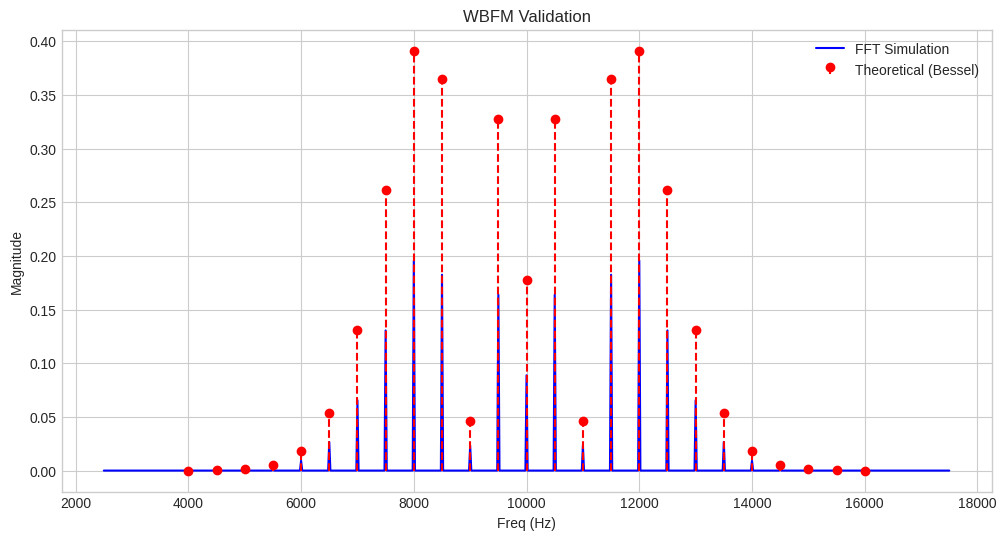

In [5]:
def plot_wbfm_validation(sig, fs, beta, fc, fm, title="WBFM Validation"):
    n = len(sig)
    k = np.arange(n)
    T = n/fs
    frq = k/T 
    frq = frq[range(n//2)]
    Y = np.fft.fft(sig)/n
    Y = Y[range(n//2)]
    
    plt.figure(figsize=(12, 6))
    
    # Plot FFT
    mask = (frq >= fc - 15*fm) & (frq <= fc + 15*fm)
    plt.plot(frq[mask], abs(Y[mask]), 'b', label='FFT Simulation')
    
    # Calculate and Plot Theoretical Sidebands (Bessel)
    n_sidebands = 12
    # Indices for J_n(beta): 0, +/-1, +/-2 ...
    # We plot positive frequencies: fc + n*fm
    ns = np.arange(-n_sidebands, n_sidebands + 1)
    freqs_theoretical = fc + ns * fm
    amplitudes_theoretical = np.abs(jn(ns, beta)) * Ac # Scale by Carrier Amplitude (1.0)
    
    plt.stem(freqs_theoretical, amplitudes_theoretical, linefmt='r--', markerfmt='ro', basefmt=" ", label='Theoretical (Bessel)')
    
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_wbfm_validation(s_wbfm, fs, beta_wbfm, fc, fm)